In [ ]:
# store the data in google drive and save the file path
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/Tweet/tweets_ws23_v1.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# purpose: read / present initial data from file
import json

# Open and read the JSON file using the full path
with open(file_path, 'r') as f:
    data = json.load(f)

print("Number of Tweets:" , len(data))

# show tweet
tweetID = 0

print("Tweet", data[tweetID]["text"])
print("Component:", data[tweetID]["labels"]["topic"][0]['topic'])
print("Sentiment:", data[tweetID]["labels"]["sentiment"][0]['sentiment'])

Number of Tweets: 16949
Tweet @DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works
Component: service
Sentiment: negative


In [ ]:
# Libraries
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Covert json file to pandas dataframe
df = pd.json_normalize(data)
df_topic = pd.json_normalize(data, record_path=[['labels', 'topic']])
df_sentiment = pd.json_normalize(data, record_path=[['labels', 'sentiment']])

df_merged = pd.concat([df, df_topic, df_sentiment], axis=1)
df_merged.columns.values[11] = 'tweet_id_1'

#Data Understanding and Preparation

Original Dataset

In [ ]:
# Drop duplicated columns
columns_to_drop = ['labels.sentiment', 'labels.topic', 'tweet_id', 'user_id']
df_merged = df_merged.drop(columns=columns_to_drop)

In [ ]:
# Rename columns that have the same name in both topic and sentiment
df_merged.columns.values[12] = 'ground_truth_topic'
df_merged.columns.values[13] = 'id_topic'

df_merged.columns.values[15] = 'ground_truth_sentiment'
df_merged.columns.values[16] = 'id_sentiment'

In [ ]:
df_merged.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_1,relevant,topic,ground_truth_topic,id_topic,sentiment,ground_truth_sentiment,id_sentiment
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,0a799c07-8b76-17ba-b840-e538d51e832d,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,1fd08862-d8c7-0682-6b11-2603fba22d94,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   source_created_at       16949 non-null  object 
 1   author_id               16949 non-null  object 
 2   text                    16949 non-null  object 
 3   source                  16949 non-null  object 
 4   language                16949 non-null  object 
 5   longitude               1425 non-null   float64
 6   latitude                1425 non-null   float64
 7   id                      16949 non-null  object 
 8   source_id               15548 non-null  object 
 9   tweet_id_1              16949 non-null  object 
 10  relevant                16949 non-null  bool   
 11  topic                   16949 non-null  object 
 12  ground_truth_topic      16949 non-null  bool   
 13  id_topic                16949 non-null  object 
 14  sentiment               16949 non-null

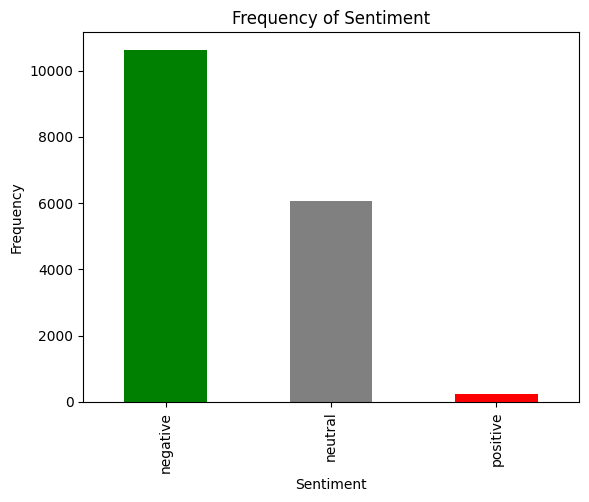

In [ ]:
# Frequency of sentiment variables
sentiment_count = df_merged['sentiment'].value_counts()
sentiment_count.plot(kind='bar', color = ['green', 'gray', 'red'])
plt.title('Frequency of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sentiment_count

negative    10628
neutral      6079
positive      242
Name: sentiment, dtype: int64

In [ ]:
sentiment_count_percent = df_merged['sentiment'].value_counts(normalize = True) * 100
sentiment_count_percent

negative    62.705764
neutral     35.866423
positive     1.427813
Name: sentiment, dtype: float64

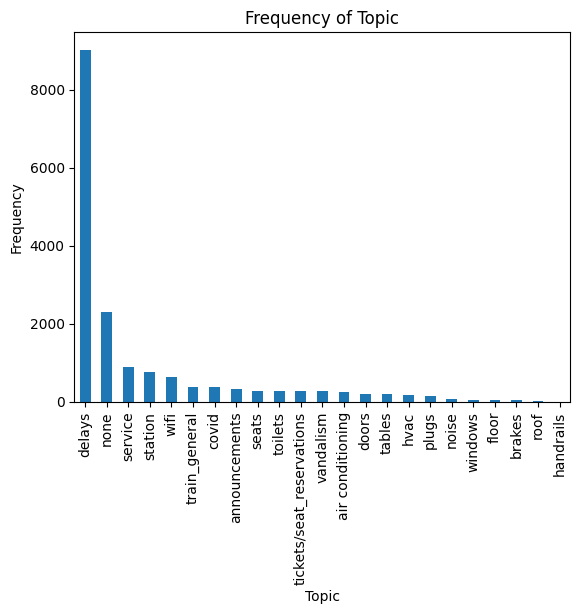

In [ ]:
# Frequency of topic variables
topic_count = df_merged['topic'].value_counts()
topic_count.plot(kind='bar')
plt.title('Frequency of Topic')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

In [ ]:
topic_count_percent = df_merged['topic'].value_counts(normalize = True) * 100
topic_count_percent

delays                       53.236179
none                         13.593722
service                       5.215647
station                       4.448640
wifi                          3.658033
train_general                 2.271520
covid                         2.212520
announcements                 1.858517
seats                         1.669715
toilets                       1.663815
tickets/seat_reservations     1.610714
vandalism                     1.610714
air conditioning              1.486813
doors                         1.162310
tables                        1.115110
hvac                          1.014809
plugs                         0.796507
noise                         0.454304
windows                       0.295003
floor                         0.265502
brakes                        0.259602
roof                          0.088501
handrails                     0.011800
Name: topic, dtype: float64

In [ ]:
# Create an empty data dictionary to store the results
summary_data = {}

# Iterate through each column and calculate the corresponding metrics
for column in df_merged:
    total_number = len(df_merged)
    unique_number = len(df_merged[column].unique())
    duplicate = df_merged.duplicated(subset=column).sum()
    na = df_merged[column].isna().sum()

    summary_data[column] = {
        'Total': total_number,
        'Unique Values': unique_number,
        'Duplicated Values': duplicate,
        'NA Values': na
    }

# Create a data frame containing the metrics
summary_df = pd.DataFrame(summary_data).T

# Print the results
print(summary_df)

Split: 'Sentiment' as a target variable

In [ ]:
df_merged_sentiment = df_merged.copy()
df_merged_sentiment.info()

In [ ]:
# Splitting - Sentiment
import numpy as np
from sklearn.model_selection import train_test_split
X_sentiment = df_merged_sentiment.drop(columns=['sentiment'])
y_sentiment = df_merged_sentiment['sentiment']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)

In [ ]:
print("Training data:", y_sentiment_train.value_counts(normalize=True))
print("Test data:", y_sentiment_test.value_counts(normalize=True))

Training data: negative    0.627037
neutral     0.358655
positive    0.014308
Name: sentiment, dtype: float64
Test data: negative    0.627139
neutral     0.358702
positive    0.014159
Name: sentiment, dtype: float64


In [ ]:
print("Training set size:", len(X_sentiment_train))
print("Test set size:", len(X_sentiment_test))

Training set size: 13559
Test set size: 3390


In [ ]:
# sentiment dataframe
df2 = pd.concat([X_sentiment_train, y_sentiment_train], axis=1)
df2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13559 entries, 11068 to 1382
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   source_created_at       13559 non-null  object 
 1   author_id               13559 non-null  object 
 2   text                    13559 non-null  object 
 3   source                  13559 non-null  object 
 4   language                13559 non-null  object 
 5   longitude               1119 non-null   float64
 6   latitude                1119 non-null   float64
 7   id                      13559 non-null  object 
 8   source_id               12458 non-null  object 
 9   tweet_id_1              13559 non-null  object 
 10  relevant                13559 non-null  bool   
 11  topic                   13559 non-null  object 
 12  ground_truth_topic      13559 non-null  bool   
 13  id_topic                13559 non-null  object 
 14  ground_truth_sentiment  13559 non-n

Split: 'Topic' as a target variable

In [ ]:
df_merged_topic = df_merged.copy()
df_merged_topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   source_created_at       16949 non-null  object 
 1   author_id               16949 non-null  object 
 2   text                    16949 non-null  object 
 3   source                  16949 non-null  object 
 4   language                16949 non-null  object 
 5   longitude               1425 non-null   float64
 6   latitude                1425 non-null   float64
 7   id                      16949 non-null  object 
 8   source_id               15548 non-null  object 
 9   tweet_id_1              16949 non-null  object 
 10  relevant                16949 non-null  bool   
 11  topic                   16949 non-null  object 
 12  ground_truth_topic      16949 non-null  bool   
 13  id_topic                16949 non-null  object 
 14  sentiment               16949 non-null

In [ ]:
# Splitting - Topic
import numpy as np
from sklearn.model_selection import train_test_split
X_topic = df_merged_topic.drop(columns=['topic'])
y_topic = df_merged_topic['topic']
X_topic_train, X_topic_test, y_topic_train, y_topic_test = train_test_split(X_topic, y_topic, test_size=0.2, random_state=42, stratify=y_topic)

In [ ]:
print("Training data:", y_topic_train.value_counts(normalize=True))
print("Test data:", y_topic_test.value_counts(normalize=True))

Training data: delays                       0.532340
none                         0.135924
service                      0.052142
station                      0.044472
wifi                         0.036581
train_general                0.022716
covid                        0.022126
announcements                0.018585
seats                        0.016668
toilets                      0.016668
vandalism                    0.016078
tickets/seat_reservations    0.016078
air conditioning             0.014898
doors                        0.011653
tables                       0.011137
hvac                         0.010178
plugs                        0.007965
noise                        0.004573
windows                      0.002950
floor                        0.002655
brakes                       0.002581
roof                         0.000885
handrails                    0.000148
Name: topic, dtype: float64
Test data: delays                       0.532448
none                         0.135

In [ ]:
print("Training set size:", len(X_topic_train))
print("Test set size:", len(X_topic_test))

Training set size: 13559
Test set size: 3390


**DATA PREPARATION**

'Sentiment' as a target variable

In [ ]:
# Create an empty data dictionary to store the results
sentiment_summary_data = {}

# Iterate through each column and calculate the corresponding metrics
for column in df2:
    total_number = len(df2)
    unique_number = len(df2[column].unique())
    duplicate = df2.duplicated(subset=column).sum()
    na = df2[column].isna().sum()

    sentiment_summary_data[column] = {
        'Total': total_number,
        'Unique Values': unique_number,
        'Duplicated Values': duplicate,
        'NA Values': na
    }

# Create a data frame containing the metrics
sentiment_summary_df = pd.DataFrame(sentiment_summary_data).T

# Print the results
print(sentiment_summary_df)

                        Total  Unique Values  Duplicated Values  NA Values
source_created_at       13559          12722                837          0
author_id               13559           6082               7477          0
text                    13559          12758                801          0
source                  13559              2              13557          0
language                13559              2              13557          0
longitude               13559            138              13421      12440
latitude                13559            139              13420      12440
id                      13559          12758                801          0
source_id               13559          11737               1822       1101
tweet_id_1              13559          12758                801          0
relevant                13559              1              13558          0
topic                   13559             23              13536          0
ground_truth_topic      1

In [ ]:
# Drop duplicated columns
df2_columns_to_drop = ['source_created_at', 'author_id', 'source', 'language', 'longitude', 'latitude',
                       'id', 'source_id', 'tweet_id_1', 'relevant', 'ground_truth_topic', 'id_topic', 'ground_truth_sentiment', 'id_sentiment']
df2 = df2.drop(columns = df2_columns_to_drop)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13559 entries, 11068 to 1382
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       13559 non-null  object
 1   topic      13559 non-null  object
 2   sentiment  13559 non-null  object
dtypes: object(3)
memory usage: 423.7+ KB


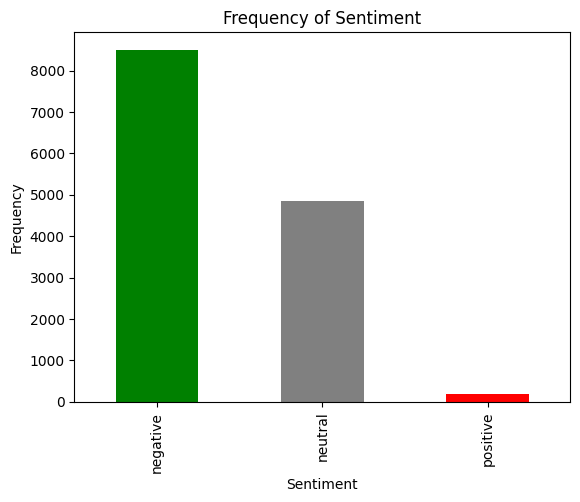

In [ ]:
# Frequency of sentiment variables
df2_sentiment_count = df2['sentiment'].value_counts()
df2_sentiment_count.plot(kind='bar', color = ['green', 'gray', 'red'])
plt.title('Frequency of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df2_sentiment_count

negative    8502
neutral     4863
positive     194
Name: sentiment, dtype: int64

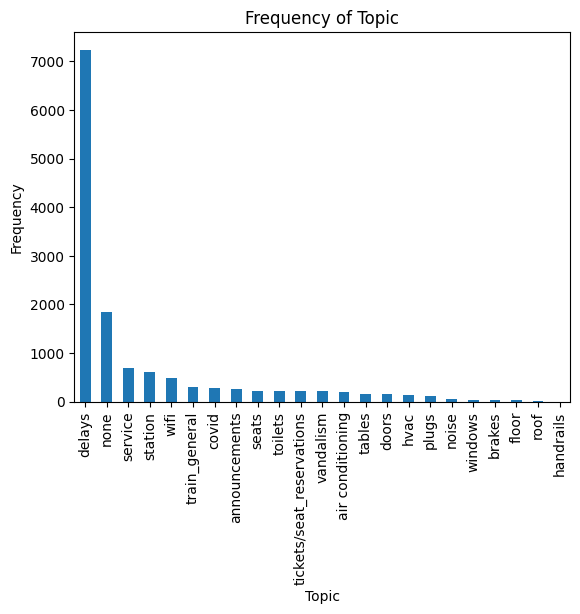

In [ ]:
# Frequency of topic variables
df2_topic_count = df2['topic'].value_counts()
df2_topic_count.plot(kind='bar')
plt.title('Frequency of Topic')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Encoding the 'topic' and 'sentiment' column
encode_sentiment = {'negative': 0, 'neutral': 1, 'positive': 2}
encode_topic = {'delays': 0, 'none': 1, 'service': 2, 'station': 3, 'wifi': 4, 'train_general': 5, 'covid': 6,
                'announcements': 7, 'seats': 8, 'toilets': 9, 'tickets/seat_reservations': 10, 'vandalism': 11,
                'air conditioning': 12, 'doors': 13, 'tables': 14, 'hvac': 15, 'plugs': 16, 'noise': 17, 'windows': 18,
                'floor': 19, 'brakes': 20, 'roof': 21, 'handrails': 22}

df2['sentiment'] = df2['sentiment'].replace(encode_sentiment)
df2['topic'] = df2['topic'].replace(encode_topic)

In [ ]:
# Checking for null values in each columns
df2_null_counts = df2.isnull().sum()
df2_null_counts

text         0
topic        0
sentiment    0
dtype: int64

In [ ]:
# Check unique values in each columns
df2_unique_values = df2.apply(lambda x: len(x.value_counts()))
df2_unique_values

text         12758
topic           23
sentiment        3
dtype: int64

In [ ]:
# Remove rows that contain tweets from official account of ThamesLink
df2_TL = df2[df2['text'].str.contains(r'^#TLUpdates|\(Thameslink Update\)')]
df2_TL # 996

In [ ]:
df2 = df2.drop(df2_TL.index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12563 entries, 11068 to 14699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       12563 non-null  object
 1   topic      12563 non-null  int64 
 2   sentiment  12563 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 392.6+ KB


In [ ]:
# Remove duplicated tweet in 'text' column
df2_duplicate = df2[df2.duplicated(['text'])] # 768
df2_duplicate_grouped = df2_duplicate.groupby('text').size().reset_index(name='count')
df2_duplicate

,text,topic,sentiment
7067,@TLRailUK Really impressed with the train driv...,0,2
1492,.@TLRailUK How about asking your drivers to op...,2,1
15143,@Busoccultation @geofftech Woolwich Arsenal is...,2,1
11397,@sydkearle123 @TLRailUK The toilets would be c...,11,0
6178,@TLRailUK I don't know why it didn't post my r...,1,0
...,...,...,...
5366,@TLRailUK Also you might want to tell your oth...,2,0
15702,@TLRailUK It doesn’t really matter as it’s can...,0,0
10051,@TLRailUK your tickets don’t work in machines(...,16,0
8719,"@TLRailUK hi, my train to london from bedford ...",14,0


In [ ]:
df2 = df2.drop(df2_duplicate.index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11795 entries, 11068 to 14699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11795 non-null  object
 1   topic      11795 non-null  int64 
 2   sentiment  11795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 368.6+ KB


In [ ]:
# Lowercase
df2['text'] = df2['text'].str.lower()
df2['text'].head()

11068    @mrawykes @tlrailuk thanks andy, gillingham ar...
11324    @schwoerk81 @tlrailuk at least you'll be able ...
13016    passengers on the 07:11 from east croydon to b...
6700     @tlrailuk keysmartcard not loading at woldingh...
6300     @tlrailuk i think you forgot to mention about ...
Name: text, dtype: object

In [ ]:
# Stopwords
from wordcloud import WordCloud, STOPWORDS

my_stopwords = set(STOPWORDS)
custom_stopwords = {'tlrailuk', 'thameslink', 'train', 'station'}

# Add custom stopwords to the set
my_stopwords.update(custom_stopwords)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in my_stopwords])

df2['text'] = df2['text'].apply(lambda text: cleaning_stopwords(text))
df2['text'].head()

11068    @mrawykes @tlrailuk thanks andy, gillingham re...
11324         @schwoerk81 @tlrailuk least able doors shut.
13016    passengers 07:11 east croydon bedford via lond...
6700     @tlrailuk keysmartcard loading woldingham - no...
6300     @tlrailuk think forgot mention shortage crew m...
Name: text, dtype: object

In [ ]:
# URLs
import re

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df2['text'] = df2['text'].apply(lambda x: cleaning_URLs(x))
df2['text']

11068    @mrawykes @tlrailuk thanks andy, gillingham re...
11324         @schwoerk81 @tlrailuk least able doors shut.
13016    passengers 07:11 east croydon bedford via lond...
6700     @tlrailuk keysmartcard loading woldingham - no...
6300     @tlrailuk think forgot mention shortage crew m...
                               ...                        
15314    @gatwick_airport @tlrailuk hello, 21.06 bedfor...
15187    🆕 #125new - disruption bedford #luton expected...
10782    @hggiles hello hasret. able show us screenshot...
5541     @tlrailuk anyone explain thameshite already de...
14699    ⚠️ #tlupdates - services reduced speed lines b...
Name: text, Length: 11795, dtype: object

In [ ]:
# Username
def remove_usernames(dataframe):
    """
    Remove usernames (strings containing '@') from the 'text' column of the DataFrame.

    Parameters:
    - dataframe: DataFrame containing a 'text' column to process

    Returns:
    - dataframe_no_usernames: DataFrame with usernames removed from the 'text' column
    """

    # Remove usernames from the 'text' column
    df2['text'] = df2['text'].replace(to_replace=r'@\w+', value='', regex=True)

    return df2

# Apply the function
df2 = remove_usernames(df2)
print(df2['text'])

11068      thanks andy, gillingham ready prepared assis...
11324                               least able doors shut.
13016    passengers 07:11 east croydon bedford via lond...
6700      keysmartcard loading woldingham - now 2 weeks...
6300      think forgot mention shortage crew members, l...
                               ...                        
15314      hello, 21.06 bedford gatwick changed platfor...
15187    🆕 #125new - disruption bedford #luton expected...
10782     hello hasret. able show us screenshot please?...
5541      anyone explain thameshite already delayed 15....
14699    ⚠️ #tlupdates - services reduced speed lines b...
Name: text, Length: 11795, dtype: object


In [ ]:
# Punctuation
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df2['text']= df2['text'].apply(lambda x: cleaning_punctuations(x))
df2['text']

11068      thanks andy gillingham ready prepared assist...
11324                                least able doors shut
13016    passengers 0711 east croydon bedford via londo...
6700      keysmartcard loading woldingham  now 2 weeks ...
6300      think forgot mention shortage crew members la...
                               ...                        
15314      hello 2106 bedford gatwick changed platform ...
15187    🆕 125new  disruption bedford luton expected 12...
10782     hello hasret able show us screenshot please s...
5541      anyone explain thameshite already delayed 154...
14699    ⚠️ tlupdates  services reduced speed lines bla...
Name: text, Length: 11795, dtype: object

In [ ]:
# Emoji
!pip install demoji
import demoji

def remove_emojis(text):
    return demoji.replace(text, '')


df2['text'] = df2['text'].apply(remove_emojis)
df2['text']

11068      thanks andy gillingham ready prepared assist...
11324                                least able doors shut
13016    passengers 0711 east croydon bedford via londo...
6700      keysmartcard loading woldingham  now 2 weeks ...
6300      think forgot mention shortage crew members la...
                               ...                        
15314      hello 2106 bedford gatwick changed platform ...
15187     125new  disruption bedford luton expected 120...
10782     hello hasret able show us screenshot please s...
5541      anyone explain thameshite already delayed 154...
14699     tlupdates  services reduced speed lines black...
Name: text, Length: 11795, dtype: object

In [ ]:
### remove number
def remove_numbers(dataframe):
    # Remove numbers from the 'text' column
    dataframe['text'] = dataframe['text'].apply(lambda x: re.sub(r'\d+', '', x))

    return dataframe

# Apply the function
df2 = remove_numbers(df2)
print(df2['text'])

11068      thanks andy gillingham ready prepared assist...
11324                                least able doors shut
13016    passengers  east croydon bedford via london br...
6700      keysmartcard loading woldingham  now  weeks r...
6300      think forgot mention shortage crew members la...
                               ...                        
15314      hello  bedford gatwick changed platform with...
15187     new  disruption bedford luton expected this d...
10782     hello hasret able show us screenshot please s...
5541      anyone explain thameshite already delayed  st...
14699     tlupdates  services reduced speed lines black...
Name: text, Length: 11795, dtype: object


In [ ]:
# Tokenized
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    """
    Tokenize the input text using word_tokenize.

    Parameters:
    - text: Text to tokenize

    Returns:
    - tokens: List of tokens
    """
    tokens = word_tokenize(text)
    return tokens

def word_tokenize_dataframe(dataframe, column='text'):
    """
    Apply tokenize_text to the specified column of the DataFrame.

    Parameters:
    - dataframe: DataFrame containing the specified column to tokenize
    - column: Name of the column to tokenize (default is 'text')

    Returns:
    - dataframe_tokenized: DataFrame with the specified column tokenized
    """
    dataframe[column] = dataframe[column].apply(lambda x: tokenize_text(x) if isinstance(x, str) else x)
    return dataframe


# Apply the function
df2 = word_tokenize_dataframe(df2, column='text')
print(df2['text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


11068    [thanks, andy, gillingham, ready, prepared, as...
11324                           [least, able, doors, shut]
13016    [passengers, east, croydon, bedford, via, lond...
6700     [keysmartcard, loading, woldingham, now, weeks...
6300     [think, forgot, mention, shortage, crew, membe...
                               ...                        
15314    [hello, bedford, gatwick, changed, platform, w...
15187    [new, disruption, bedford, luton, expected, th...
10782    [hello, hasret, able, show, us, screenshot, pl...
5541     [anyone, explain, thameshite, already, delayed...
14699    [tlupdates, services, reduced, speed, lines, b...
Name: text, Length: 11795, dtype: object


In [ ]:
from nltk.stem import PorterStemmer

### stemmimg
def stemming(dataframe):
    # Initialize the Porter Stemmer
    st = nltk.PorterStemmer()

    # Apply stemming to the 'text' column
    dataframe['text'] = dataframe['text'].apply(lambda x: [st.stem(word) for word in x])

    return dataframe

# Apply the function
df2 = stemming(df2)
print(df2)

                                                    text  topic  sentiment
11068  [thank, andi, gillingham, readi, prepar, assis...      0          0
11324                           [least, abl, door, shut]     13          1
13016  [passeng, east, croydon, bedford, via, london,...     13          0
6700   [keysmartcard, load, woldingham, now, week, ro...     10          1
6300   [think, forgot, mention, shortag, crew, member...     15          0
...                                                  ...    ...        ...
15314  [hello, bedford, gatwick, chang, platform, wit...      2          0
15187  [new, disrupt, bedford, luton, expect, thi, du...      1          1
10782  [hello, hasret, abl, show, us, screenshot, ple...      5          1
5541   [anyon, explain, thameshit, alreadi, delay, st...      0          0
14699  [tlupdat, servic, reduc, speed, line, blackfri...      0          0

[11795 rows x 3 columns]


In [ ]:
### lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def apply_lemmatization(dataframe):
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize a list of words
    def lemmatize_on_text(data):
        lemmatized_text = [lemmatizer.lemmatize(word) for word in data]
        return lemmatized_text

    # Apply lemmatization to the 'text' column
    dataframe['text'] = dataframe['text'].apply(lambda x: lemmatize_on_text(x))

    return dataframe

# Apply the function
df2 = apply_lemmatization(df2)
print(df2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                    text  topic  sentiment
11068  [thank, andi, gillingham, readi, prepar, assis...      0          0
11324                           [least, abl, door, shut]     13          1
13016  [passeng, east, croydon, bedford, via, london,...     13          0
6700   [keysmartcard, load, woldingham, now, week, ro...     10          1
6300   [think, forgot, mention, shortag, crew, member...     15          0
...                                                  ...    ...        ...
15314  [hello, bedford, gatwick, chang, platform, wit...      2          0
15187  [new, disrupt, bedford, luton, expect, thi, du...      1          1
10782  [hello, hasret, abl, show, u, screenshot, plea...      5          1
5541   [anyon, explain, thameshit, alreadi, delay, st...      0          0
14699  [tlupdat, servic, reduc, speed, line, blackfri...      0          0

[11795 rows x 3 columns]


In [ ]:
print(df2['text'])

11068    [thank, andi, gillingham, readi, prepar, assis...
11324                             [least, abl, door, shut]
13016    [passeng, east, croydon, bedford, via, london,...
6700     [keysmartcard, load, woldingham, now, week, ro...
6300     [think, forgot, mention, shortag, crew, member...
                               ...                        
15314    [hello, bedford, gatwick, chang, platform, wit...
15187    [new, disrupt, bedford, luton, expect, thi, du...
10782    [hello, hasret, abl, show, u, screenshot, plea...
5541     [anyon, explain, thameshit, alreadi, delay, st...
14699    [tlupdat, servic, reduc, speed, line, blackfri...
Name: text, Length: 11795, dtype: object


In [ ]:
# worldcloud
df2_wordcloud_negative = df2[df2['sentiment'] == 0]
df2_wordcloud_negative

,text,topic,sentiment
11068,"[thank, andi, gillingham, readi, prepar, assis...",0,0
13016,"[passeng, east, croydon, bedford, via, london,...",13,0
6300,"[think, forgot, mention, shortag, crew, member...",15,0
4498,"[king, cross, peterborough, delay, vanish, boa...",0,0
12185,"[govia, railway, gtr, quash, trainwash, sign, ...",1,0
...,...,...,...
15664,"[quid, fix, leaki, roof, finsburi, park, ️]",3,0
8330,"[frequenc, annoy, see, it, say, it, sort, anno...",1,0
15314,"[hello, bedford, gatwick, chang, platform, wit...",2,0
5541,"[anyon, explain, thameshit, alreadi, delay, st...",0,0


In [ ]:
df2_wordcloud_negative['text'] = df2_wordcloud_negative['text'].apply(lambda x: ' '.join(x))
df2_wordcloud_negative

<ipython-input-101-e5ff7b5b59fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_wordcloud_negative['text'] = df2_wordcloud_negative['text'].apply(lambda x: ' '.join(x))


,text,topic,sentiment
11068,thank andi gillingham readi prepar assist see ...,0,0
13016,passeng east croydon bedford via london bridg ...,13,0
6300,think forgot mention shortag crew member lack ...,15,0
4498,king cross peterborough delay vanish board kin...,0,0
12185,govia railway gtr quash trainwash sign petit s...,1,0
...,...,...,...
15664,quid fix leaki roof finsburi park ️,3,0
8330,frequenc annoy see it say it sort announc sort...,1,0
15314,hello bedford gatwick chang platform without a...,2,0
5541,anyon explain thameshit alreadi delay stp luto...,0,0


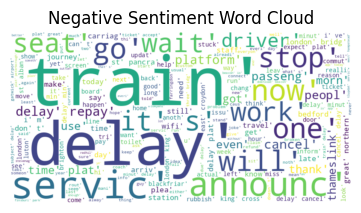

In [ ]:
### worldcloud
# 'negative': 0, 'neutral': 1, 'positive': 2
# Select observations with sentiment_encoded values 0, 1, and 2
sentiment_0_text = df2[df2['sentiment'] == 0]['text']
sentiment_1_text = df2[df2['sentiment'] == 1]['text']
sentiment_2_text = df2[df2['sentiment'] == 2]['text']

# Combine all texts into a single string
all_text_0 = ' '.join(sentiment_0_text.astype(str))
all_text_1 = ' '.join(sentiment_1_text.astype(str))
all_text_2 = ' '.join(sentiment_2_text.astype(str))

# Create WordCloud objects
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(all_text_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(all_text_1)
wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate(all_text_2)

# Display WordClouds
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

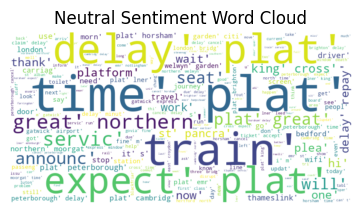

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(132)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')
plt.show()

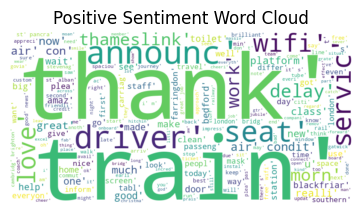

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(133)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()

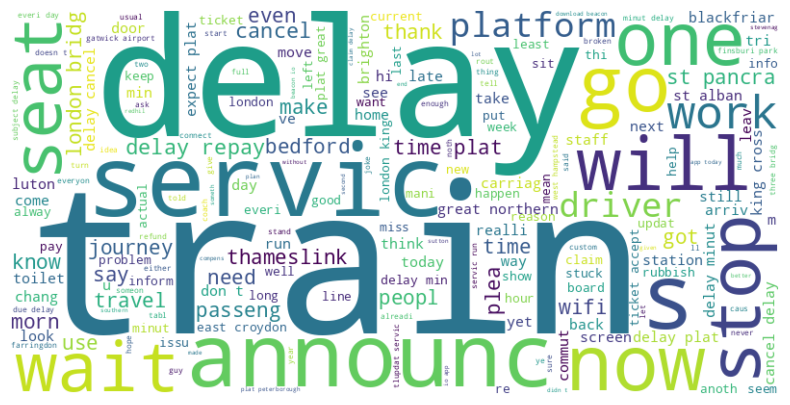

In [ ]:
# Combine all text in the DataFrame
join_text = " ".join(df2_wordcloud_negative['text'])

# Create and generate a word cloud image
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(join_text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11795 entries, 11068 to 14699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11795 non-null  object
 1   topic      11795 non-null  int64 
 2   sentiment  11795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 368.6+ KB


# Data Modeling

In [ ]:
df3 = df_merged.copy()
df3.info()

In [ ]:
# Drop duplicated columns
df3_columns_to_drop = ['source_created_at', 'author_id', 'source', 'language', 'longitude', 'latitude',
                       'id', 'source_id', 'tweet_id_1', 'relevant', 'ground_truth_topic', 'id_topic', 'ground_truth_sentiment', 'id_sentiment']
df3 = df3.drop(columns = df3_columns_to_drop)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       16949 non-null  object
 1   topic      16949 non-null  object
 2   sentiment  16949 non-null  object
dtypes: object(3)
memory usage: 397.4+ KB


In [ ]:
# combine 'neutral' and 'positive' to 'non-negative'
df3['sentiment'] = df3['sentiment'].replace({'neutral': 'non-negative',
                                             'positive': 'non-negative',
                                             'negative': 'negative'})

In [ ]:
# new sentiment encoding
encode_sentiment = {'negative': 0, 'non-negative': 1}
df3['sentiment'] = df3['sentiment'].map(encode_sentiment)

In [ ]:
# plot frequency distribution for new label
new_frequency_distribution = df3['sentiment'].value_counts()

plt.bar(new_frequency_distribution.index, new_frequency_distribution.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Sentiments')
plt.xticks(new_frequency_distribution.index, ['Negative', 'Non-Negative'])
for i, value in enumerate(new_frequency_distribution.values):
    percentage = (value / len(df3)) * 100
    plt.text(i, value + 1, f'{percentage:.2f}%', ha='center')

plt.show()

In [ ]:
# splitting - Sentiment
import numpy as np
from sklearn.model_selection import train_test_split

X_sentiment = df3.drop(columns=['sentiment'])
y_sentiment = df3['sentiment']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)

print("Training data:", y_sentiment_train.value_counts(normalize=True))
print("Test data:", y_sentiment_test.value_counts(normalize=True))

print("Training set size:", len(X_sentiment_train))
print("Test set size:", len(X_sentiment_test))

Training data: 0    0.633815
1    0.366185
Name: sentiment, dtype: float64
Test data: 0    0.633769
1    0.366231
Name: sentiment, dtype: float64
Training set size: 11628
Test set size: 2908


In [ ]:
# sentiment dataframe
df3_training = pd.concat([X_sentiment_train, y_sentiment_train], axis=1)
df3_training.info()

In [ ]:
# Remove rows that contain tweets from official account of ThamesLink
df3_TL = df3[df3['text'].str.contains(r'^#TLUpdates|\(Thameslink Update\)')]
df3 = df3.drop(df3_TL.index)
df3.info()

In [ ]:
# Remove duplicated tweet in 'text' column
df3_duplicate = df3[df3.duplicated(['text'])]
df3 = df3.drop(df3_duplicate.index)
df3.info()

In [ ]:
# Lowercase
df3['text'] = df3['text'].str.lower()
df3['text'].head()

0    @dsisourath the thameslink core london st panc...
1    @dulwichhistory loving complaint people wait 1...
2    @sw_help .and yet toilets trains, #dorking #wa...
3    @sw_help toilets trains, #dorking #waterloo ta...
4    @speedysticks007 @mrneiljh @tlrailuk @christia...
Name: text, dtype: object

In [ ]:
# Stopwords
from wordcloud import WordCloud, STOPWORDS

my_stopwords = set(STOPWORDS)
custom_stopwords = {'tlrailuk', 'thameslink', 'train', 'station'}

# Add custom stopwords to the set
my_stopwords.update(custom_stopwords)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in my_stopwords])

df3['text'] = df3['text'].apply(lambda text: cleaning_stopwords(text))
df3['text'].head()

0    @dsisourath core london st pancras london blac...
1    @dulwichhistory loving complaint people wait 1...
2    @sw_help .and yet toilets trains, #dorking #wa...
3    @sw_help toilets trains, #dorking #waterloo ta...
4    @speedysticks007 @mrneiljh @tlrailuk @christia...
Name: text, dtype: object

In [ ]:
# URLs
import re

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df3['text'] = df3['text'].apply(lambda x: cleaning_URLs(x))
df3['text']

0        @dsisourath core london st pancras london blac...
1        @dulwichhistory loving complaint people wait 1...
2        @sw_help .and yet toilets trains, #dorking #wa...
3        @sw_help toilets trains, #dorking #waterloo ta...
4        @speedysticks007 @mrneiljh @tlrailuk @christia...
                               ...                        
16943    st. alban's city pis screen firmware updated h...
16944    haha oh man audio corruption @tlrailuk quite e...
16945                 @tlrailuk sweetis plug charge phone?
16946    @tlrailuk now far fewer commuters stand cram t...
16947    @geofftech voting thameslink. 1. pandemic peri...
Name: text, Length: 14536, dtype: object

In [ ]:
# Username
def remove_usernames(dataframe):
    """
    Remove usernames (strings containing '@') from the 'text' column of the DataFrame.

    Parameters:
    - dataframe: DataFrame containing a 'text' column to process

    Returns:
    - dataframe_no_usernames: DataFrame with usernames removed from the 'text' column
    """

    # Remove usernames from the 'text' column
    df3['text'] = df3['text'].replace(to_replace=r'@\w+', value='', regex=True)

    return df3

# Apply the function
df3 = remove_usernames(df3)
print(df3['text'])

0         core london st pancras london blackfriars rus...
1         loving complaint people wait 10 minutes train...
2         .and yet toilets trains, #dorking #waterloo  ...
3         toilets trains, #dorking #waterloo talking #d...
4              daft cared money backsides seats. disabl...
                               ...                        
16943    st. alban's city pis screen firmware updated h...
16944    haha oh man audio corruption  quite entertaini...
16945                           sweetis plug charge phone?
16946     now far fewer commuters stand cram trains, pu...
16947     voting thameslink. 1. pandemic period easier ...
Name: text, Length: 14536, dtype: object


In [ ]:
# Punctuation
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df3['text']= df3['text'].apply(lambda x: cleaning_punctuations(x))
df3['text']

0         core london st pancras london blackfriars rus...
1         loving complaint people wait 10 minutes train...
2         and yet toilets trains dorking waterloo  mana...
3         toilets trains dorking waterloo talking disab...
4              daft cared money backsides seats disable...
                               ...                        
16943    st albans city pis screen firmware updated hea...
16944    haha oh man audio corruption  quite entertaini...
16945                            sweetis plug charge phone
16946     now far fewer commuters stand cram trains put...
16947     voting thameslink 1 pandemic period easier so...
Name: text, Length: 14536, dtype: object

In [ ]:
# Emoji
!pip install demoji
import demoji

def remove_emojis(text):
    return demoji.replace(text, '')


df3['text'] = df3['text'].apply(remove_emojis)
df3['text']

In [ ]:
### remove number
def remove_numbers(dataframe):
    # Remove numbers from the 'text' column
    dataframe['text'] = dataframe['text'].apply(lambda x: re.sub(r'\d+', '', x))

    return dataframe

# Apply the function
df3 = remove_numbers(df3)
print(df3['text'])

In [ ]:
# Tokenized
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    """
    Tokenize the input text using word_tokenize.

    Parameters:
    - text: Text to tokenize

    Returns:
    - tokens: List of tokens
    """
    tokens = word_tokenize(text)
    return tokens

def word_tokenize_dataframe(dataframe, column='text'):
    """
    Apply tokenize_text to the specified column of the DataFrame.

    Parameters:
    - dataframe: DataFrame containing the specified column to tokenize
    - column: Name of the column to tokenize (default is 'text')

    Returns:
    - dataframe_tokenized: DataFrame with the specified column tokenized
    """
    dataframe[column] = dataframe[column].apply(lambda x: tokenize_text(x) if isinstance(x, str) else x)
    return dataframe


# Apply the function
df3 = word_tokenize_dataframe(df3, column='text')
print(df3['text'])

In [ ]:
from nltk.stem import PorterStemmer

### stemmimg
def stemming(dataframe):
    # Initialize the Porter Stemmer
    st = nltk.PorterStemmer()

    # Apply stemming to the 'text' column
    dataframe['text'] = dataframe['text'].apply(lambda x: [st.stem(word) for word in x])

    return dataframe

# Apply the function
df3 = stemming(df3)
print(df3)

                                                    text          topic  \
0      [core, london, st, pancra, london, blackfriar,...        service   
1      [love, complaint, peopl, wait, minut, trainthe...         delays   
2      [and, yet, toilet, train, dork, waterloo, mana...        toilets   
3      [toilet, train, dork, waterloo, talk, disabl, ...        toilets   
4      [daft, care, money, backsid, seat, disabl, ada...          seats   
...                                                  ...            ...   
16943  [st, alban, citi, pi, screen, firmwar, updat, ...  announcements   
16944  [haha, oh, man, audio, corrupt, quit, entertai...  announcements   
16945                       [sweeti, plug, charg, phone]          plugs   
16946  [now, far, fewer, commut, stand, cram, train, ...         tables   
16947  [vote, thameslink, pandem, period, easier, soc...        toilets   

       sentiment  
0              0  
1              0  
2              0  
3              0  
4   

In [ ]:
### lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def apply_lemmatization(dataframe):
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize a list of words
    def lemmatize_on_text(data):
        lemmatized_text = [lemmatizer.lemmatize(word) for word in data]
        return lemmatized_text

    # Apply lemmatization to the 'text' column
    dataframe['text'] = dataframe['text'].apply(lambda x: lemmatize_on_text(x))

    return dataframe

# Apply the function
df3 = apply_lemmatization(df3)
print(df3)

In [ ]:
print(df3)

                                                    text          topic  \
0      [core, london, st, pancra, london, blackfriar,...        service   
1      [love, complaint, peopl, wait, minut, trainthe...         delays   
2      [and, yet, toilet, train, dork, waterloo, mana...        toilets   
3      [toilet, train, dork, waterloo, talk, disabl, ...        toilets   
4      [daft, care, money, backsid, seat, disabl, ada...          seats   
...                                                  ...            ...   
16943  [st, alban, citi, pi, screen, firmwar, updat, ...  announcements   
16944  [haha, oh, man, audio, corrupt, quit, entertai...  announcements   
16945                       [sweeti, plug, charg, phone]          plugs   
16946  [now, far, fewer, commut, stand, cram, train, ...         tables   
16947  [vote, thameslink, pandem, period, easier, soc...        toilets   

       sentiment  
0              0  
1              0  
2              0  
3              0  
4   

In [ ]:
### define X_sen_train & y_sen_train
X_train = df3['text']
y_train = df3['sentiment']

In [ ]:
### Transforming the Dataset Using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert each list of words to a string
corpus = [' '.join(words) for words in X_train]

# Initialize and fit the TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(corpus)

print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

No. of feature_words:  120437


In [ ]:
### Transform the data using TF-IDF Vectorizer
X_sen_train_strings = [' '.join(words) for words in X_sen_train]
X_sen_train = vectorizer.transform(X_sen_train_strings)